In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from collections import Counter

warnings.filterwarnings('ignore')
tqdm.pandas()

import torch
import torch.nn.functional as F
from transformers import BertModel, BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained("bert-base-uncased")

In [18]:
review = pd.read_csv("item2.csv")
review = review.dropna().reset_index(drop = True)
contents = review["RPRS_PRD_CD"].unique()

vector_dict = {}
for i in tqdm(contents):
    try:
        temp = review[review["RPRS_PRD_CD"] == i]["GOODCNT"].iloc[:10]
    except:
        temp = review[review["RPRS_PRD_CD"] == i]["GOODCNT"]

    ebd = 0
    for w in temp:
        inputs = tokenizer(w, padding = "max_length", truncation = True, return_tensors = "pt", max_length = 10, add_special_tokens = False)
        with torch.no_grad():
            outputs = model(**inputs)
            projection = torch.nn.Linear(768, 128)
            ebd += projection(outputs[0])
            
    vector_dict[i] = ebd/len(temp)
vector_dict

100%|██████████| 152/152 [00:35<00:00,  4.30it/s]


{111506404: tensor([[[-0.0682, -0.0331,  0.1460,  ...,  0.0358,  0.0400,  0.1116],
          [-0.0232,  0.0394,  0.1785,  ...,  0.0535,  0.0674,  0.1018],
          [-0.0254,  0.0793,  0.1638,  ...,  0.0978,  0.0766,  0.1061],
          ...,
          [ 0.0149,  0.0645,  0.1855,  ...,  0.1346,  0.0968,  0.1470],
          [-0.0528,  0.0175,  0.1665,  ...,  0.0440,  0.1269,  0.1476],
          [-0.0470,  0.0289,  0.2064,  ...,  0.0615,  0.0978,  0.1235]]]),
 111795441: tensor([[[-0.1553,  0.0059,  0.0383,  ..., -0.0311,  0.0197, -0.0902],
          [-0.1818,  0.1014, -0.0099,  ...,  0.0048,  0.0027, -0.1585],
          [-0.1433,  0.1132, -0.0176,  ...,  0.0087, -0.0153, -0.1402],
          ...,
          [-0.1425,  0.1011, -0.0245,  ...,  0.0589, -0.0268, -0.0579],
          [-0.1636,  0.1038, -0.0294,  ...,  0.0026, -0.0644, -0.1073],
          [-0.1293,  0.0912, -0.0148,  ..., -0.0036, -0.0179, -0.0807]]]),
 111506405: tensor([[[-0.0121,  0.0390,  0.0331,  ..., -0.1018, -0.0212, -0.10

In [19]:
# import pickle

# with open(file='vector_dict2.pickle', mode='wb') as f:
#     pickle.dump(vector_dict, f)

In [22]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from collections import Counter

warnings.filterwarnings('ignore')
tqdm.pandas()

import torch
import torch.nn.functional as F
from transformers import BertModel, BertTokenizer
import pickle

with open(file='vector_dict2.pickle', mode='rb') as f:
    vector_dict = pickle.load(f)

df = pd.read_csv("internal_data.csv")
df = df.sort_values(by = "STND_YMD").reset_index(drop = True)
df["AMT"] = df["AMT"].apply(lambda x : np.log(x))

for num in tqdm(range(33)):

    cus_dict = {}
    seq_dict = {}
    df_temp = df[df["BEHAVIOR_LABEL"] == num]
    cus = list(df_temp["INCS_NO"].unique())
    
    for i in cus:
        temp = df_temp[df_temp["INCS_NO"] == i]
        seq_dict[i] = list(temp["RPRS_PRD_CD"])
        length = 0
        t = []
        for w in temp.index:
            try:
                t.append(vector_dict[int(temp["RPRS_PRD_CD"].loc[w])] * temp["AMT"].loc[w])
                length += 1
            except:
                pass
    
        val = 0
        for w in t:
            val += w
        try:    
            cus_dict[i] = val/length
        except:
            cus_dict[i] = torch.zeros(1, 10, 128)
    
    with open(file = f'C:/Users/amore/Changhyun/vector/cus_dict{num}.pickle', mode='wb') as f:
        pickle.dump(cus_dict, f)
    
    with open(file = f'C:/Users/amore/Changhyun/vector/seq_dict{num}.pickle', mode='wb') as f:
        pickle.dump(seq_dict, f)

  6%|▌         | 2/33 [03:18<51:09, 99.03s/it]


KeyboardInterrupt: 

In [7]:
# import pandas as pd

# def id_to_name(key):
#     try:
#         return review[int(float(key))]
#     except:
#         return key
        
# review = pd.read_csv("item.csv")
# df = pd.read_csv("internal_data.csv")
# review = dict(zip(review["PRD_CD"], review["PRD_NM"]))
# df["names"] = df["RPRS_PRD_CD"].apply(lambda x : id_to_name(x))

In [1]:
import pandas as pd
df = pd.read_csv("internal_data.csv")
df

,STND_YMD,INCS_NO,BEHAVIOR_LABEL,RPRS_PRD_CD,RPRS_PRD_NM,AMT,QTY
0,2024-06-16,c4790d86531e4db0486d3445ee63adbd0af08ffb64f41d...,3,111770997,이니스프리 잇츠리얼스퀴즈마스크,20000.0,20
1,2024-06-16,972f1c0155b2e32ea1f755bcb10ac0d29e89f73b09d028...,6,131172154,이니스프리 제주왕벚꽃톤업크림SPF30PA++,18210.0,1
2,2024-06-16,ba0548abd0f0a6a7542cd17870e67967a86f9bc17d13f9...,2,131173569,이니스프리 레티놀시카흔적앰플,24590.0,1
3,2024-06-16,63567534680f52a5bb1d6dafe58ef74dfb9a9dff241f40...,12,131174665,이니스프리 레티놀시카베리어크림,20750.0,1
4,2024-06-16,70c97a5679a016740b780b8b319a3fcb99f73d8e554651...,12,111705219,이니스프리 올리브리얼스킨,11700.0,1
...,...,...,...,...,...,...,...
2341280,2024-10-21,b971dc5286e4cbe894c20b33f884e009a1f5f03e7707ef...,12,131174321,이니스프리 그린티히알루론산스킨,11350.0,1
2341281,2024-10-21,459ff91bf1afae056a7dcd6cdadb2219bb09c3425c5f1e...,7,131172563,이니스프리 블랙티유스인핸싱앰플,39530.0,1
2341282,2024-10-28,c927de4e56c3329cf9f07dc79370cbd10c7d2673c23cb7...,32,131173534,이니스프리 듀이틴트립밤,25050.0,2
2341283,2024-10-28,c72bbd76e5169c56d08a90400aa7d935a696a33ed8135f...,10,111705279,이니스프리 더그린티씨드세럼,21540.0,1


In [13]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from collections import Counter

warnings.filterwarnings('ignore')
tqdm.pandas()

import torch
import torch.nn.functional as F
from transformers import BertModel, BertTokenizer
import pickle

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

df = pd.read_csv("internal_data.csv")
df = df.sort_values(by = "STND_YMD").reset_index(drop = True)
review = pd.read_csv("item.csv")
review = dict(zip(review["PRD_CD"], review["PRD_NM"]))

def id_to_name(key):
    try:
        return review[int(float(key))]
    except:
        return key

# for num in tqdm(range(33)):
#     with open(file = f'C:/Users/amore/Changhyun/vector/cus_dict{num}.pickle', mode='rb') as f:
#         cus_dict = pickle.load(f)
#     with open(file = f'C:/Users/amore/Changhyun/vector/seq_dict{num}.pickle', mode='rb') as f:
#         seq_dict = pickle.load(f)
    
#     cd = []
#     for i in cus_dict:
#         try:
#             cd.append(cus_dict[i].squeeze().flatten().numpy())
#         except:
#             cd.append(torch.zeros(1280, ))
    
#     ss = []
#     for i in range(2, 6):
#         kmeans = KMeans(n_clusters = i)
#         kmeans.fit(cd)
#         labels = kmeans.labels_
#         ss.append(silhouette_score(X = cd, labels = labels))
    
#     best_cluster_num = np.argmax(ss) + 2
    
#     kmeans = KMeans(n_clusters = best_cluster_num)
#     kmeans.fit(cd)
#     labels = kmeans.labels_
    
#     result = pd.DataFrame({"customer_id" : list(cus_dict.keys()), "sequence" : list(seq_dict.values()), "cluster" : labels})
#     lit = []
#     for i in result["sequence"]:
#         lit.append([id_to_name(w) for w in i])
#     result["names"] = lit
#     result.to_csv(f"C:/Users/amore/Changhyun/vector/result{num}.csv")

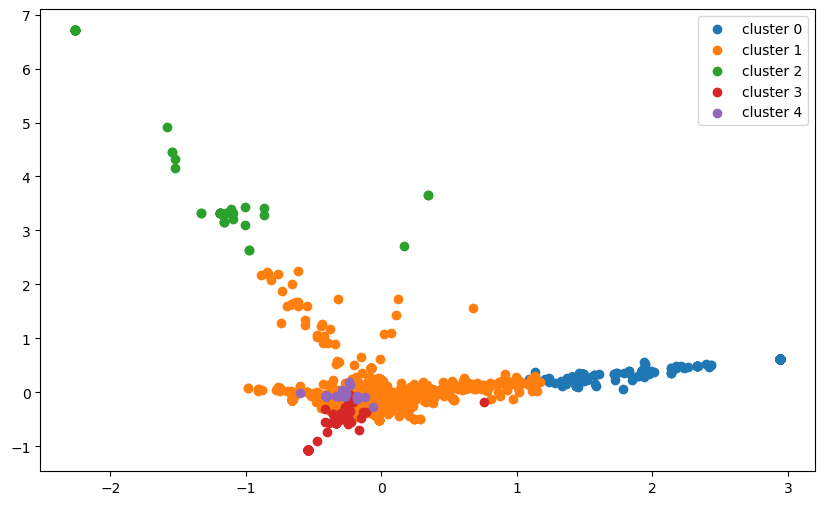

In [81]:
pca = PCA(n_components = 2)
rem = pca.fit_transform(cd)

plt.figure(figsize = (10, 6))
for i, label in enumerate(np.unique(labels)):
    cp = rem[labels == label]
    plt.scatter(cp[:, 0], cp[:, 1], label = f"cluster {i}")
    result = pd.DataFrame({"customer" : seq_dict.keys(), "sequence" : seq_dict.values(), "cluster" : labels})

plt.legend()
plt.show()

In [63]:
def dict_to_df(dic):
    temp= pd.DataFrame({"token" : list(dic.keys()), "tfidf" : list(dic.values())})
    temp = temp.sort_values(by = "tfidf", ascending = False).reset_index(drop = True)
    return temp

def to_counter(lit, total):
    lit = dict(Counter(lit))
    lit_tfidf = {}

    for i in lit:
        if lit[i] > 50:
            lit_tfidf[i] = lit[i]/total[i]

    return dict_to_df(lit_tfidf).loc[:10]

def tfidf(df):
    total = []
    zero = []
    one = []
    two = []
    three = []
    four = []

    for a, i in enumerate(result["sequence"]):
        for w in i:
            total.append(w)
            if result["cluster"].loc[a] == 0:
                zero.append(w)
            elif result["cluster"].loc[a] == 1:
                one.append(w)
            elif result["cluster"].loc[a] == 2:
                two.append(w)
            elif result["cluster"].loc[a] == 3:
                three.append(w)
            else:
                four.append(w)
                
    total = dict(Counter(total))
    everything = []
    if len(zero) > 1:
        zero = to_counter(zero, total)
        everything.append(zero)
    if len(one) > 1:
        one = to_counter(one, total)
        everything.append(one)
    if len(two) > 1:
        two = to_counter(two, total)
        everything.append(two)
    if len(three) > 1:
        three = to_counter(three, total)
        everything.append(three)
    if len(four) > 1:
        four = to_counter(four, total)
        everything.append(four)
    return everything

In [64]:
import ast

for num in tqdm(range(33)):
    result = pd.read_csv(f"C:/Users/amore/Changhyun/vector/result{num}.csv")
    result["sequence"] = result["sequence"].apply(lambda x : ast.literal_eval(x))
    temp = tfidf(result)
    temp = pd.concat(temp, axis = 1)
    col = []
    for i in range(int(len(temp.columns)/2)):
        col.append(f"item{i}")
        col.append(f"tfidf{i}")
    temp.columns = col
    temp.to_csv(f"tfidf_results{num}.csv")

100%|██████████| 33/33 [00:49<00:00,  1.50s/it]


In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from collections import Counter

import torch
import torch.nn.functional as F
from transformers import BertModel, BertTokenizer
import pickle

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

warnings.filterwarnings('ignore')
tqdm.pandas()

review = pd.read_csv("item.csv")
review = dict(zip(review["PRD_CD"], review["PRD_NM"]))

def id_to_name(key):
    try:
        return review[int(key)]
    except:
        return key

In [27]:
for num in range(33):
    temp = pd.read_csv(f"tfidf_results{num}.csv")
    cols = temp.columns[1::2]
    col = []
    for i in cols:
        col.append(i)
        col.append(i.replace("item", "name"))
        col.append(i.replace("item", "tfidf"))
        temp[i.replace("item", "name")] = [id_to_name(x) for x in temp[i]]
    temp = temp[col]
    temp.to_csv(f"named_tfidf_results{num}.csv")

In [19]:
temp

,Unnamed: 0,item0,tfidf0,item1,tfidf1,item2,tfidf2,item3,tfidf3,item4,tfidf4
0,0,131171316,0.985782,131173382.0,0.816514,131173534.0,0.854484,131173569.0,0.757862,131173707.0,0.859903
1,1,131170000,0.982857,NaN,NaN,111770183.0,0.121780,111772219.0,0.041205,NaN,NaN
2,2,111706495,0.968992,NaN,NaN,111772219.0,0.026584,111501723.0,0.035802,NaN,NaN
3,3,111772532,0.964706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,131174157,0.964286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,131173347,0.958333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,131174661,0.957447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,131171318,0.957143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,131173502,0.956522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,131172573,0.945946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
pd.read_csv("named_tfidf_results2.csv")

,Unnamed: 0,item0,name0,tfidf0,item1,name1,tfidf1
0,0,111770997,IF. 잇츠리얼스퀴즈마스크-오이 20ML,0.432545,131172756,IF.트루케어비타민C20앰플15mL (20),1.000000
1,1,111506404,111506404,0.147603,131174909,IF. 스티븐해링턴 피크닉 매트 1EA 24.03,0.993197
2,2,111771128,IF. 스킨클리닉마스크_히알루론산 20ML,0.110058,131171316,IF.포어 블러 파우더 11g,0.993046
3,3,111795082,111795082,0.100407,131174805,IF. 쉬어 글로이 하이라이터 1 5.5g,0.992188
4,4,11177_Z,11177_Z,0.089510,131173347,IF.심플라벨 워터프루프 펜슬 라이너 01 블랙 0.1g,0.990895
5,5,111795481,111795481,0.089172,131172880,IF.리스테이 카밍 컨디셔너 480ml(R),0.990654
6,6,111771154,111771154,0.082175,111795057,111795057,0.990196
7,7,111774223,111774223,0.078410,131174337,IF. 블랙티 유스 인핸싱 오일_30ML(23),0.989505
8,8,111705461,111705461,0.074422,111509119,111509119,0.988372
9,9,111770148,111770148,0.074199,131174661,IF. 라이트 글로우 쿠션 21N 14g,0.988235
